# Google Drive 마운트 하기





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#경로 설정
import os
os.chdir('/content/drive/My Drive/')

In [3]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 한글 깨짐 방지
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum

fontpath = '/content/drive/MyDrive/data/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [5]:
pip install konlpy

# 키워드 추출

텍스트 데이터 전처리

In [6]:
df = pd.read_csv('/content/drive/MyDrive/data/book_data_인문.csv', encoding='cp949')
df.head()

,id,title,intro
0,16271923_9788988349304,영혼을 위한 7단계 치유의힘,"『영혼을 위한 7단계 치유의 힘』 은 〈에너지 의학과 직관〉, 〈신의 형상을 쫓아 ..."
1,16359317_9791128812521,코로나시대 식품 미신과 과학의 투쟁큰글씨책,"『코로나 시대, 식품 미신과 과학의 투쟁(큰글씨책)』 은 〈버터〉, 〈고기〉, 〈달..."
2,16395643_9791164710324,조울증과 함께 보낸 일 년큰글씨책,두 얼굴의 감정으로 고통받는 이들과 그 곁에 있는 사람들을 위한 이야기. 저자가 1...
3,16562397_9791125478454,한국 실용글쓰기 초단기 완성2021일주일 만에 끝내는,[특징]1. 시험에 꼭 나오는 핵심포인트 502. 출제 경향을 반영한 핵심 포인트별...
4,16682643_9791163281955,학생들은 수업시간에 왜 질문하지 않는가,"『학생들은 수업시간에 왜 질문하지 않는가?』는 〈서론〉, 〈이론적 배경〉, 〈결과 ..."


In [7]:
import re

# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

In [8]:
# ‘id’ 피처에 이를 적용합니다.
df['ko_id'] = df['id'].apply(lambda x: text_cleaning(x))
df.head()

,id,title,intro,ko_id
0,16271923_9788988349304,영혼을 위한 7단계 치유의힘,"『영혼을 위한 7단계 치유의 힘』 은 〈에너지 의학과 직관〉, 〈신의 형상을 쫓아 ...",
1,16359317_9791128812521,코로나시대 식품 미신과 과학의 투쟁큰글씨책,"『코로나 시대, 식품 미신과 과학의 투쟁(큰글씨책)』 은 〈버터〉, 〈고기〉, 〈달...",
2,16395643_9791164710324,조울증과 함께 보낸 일 년큰글씨책,두 얼굴의 감정으로 고통받는 이들과 그 곁에 있는 사람들을 위한 이야기. 저자가 1...,
3,16562397_9791125478454,한국 실용글쓰기 초단기 완성2021일주일 만에 끝내는,[특징]1. 시험에 꼭 나오는 핵심포인트 502. 출제 경향을 반영한 핵심 포인트별...,
4,16682643_9791163281955,학생들은 수업시간에 왜 질문하지 않는가,"『학생들은 수업시간에 왜 질문하지 않는가?』는 〈서론〉, 〈이론적 배경〉, 〈결과 ...",


In [9]:
# ‘title’ 피처에 이를 적용합니다.
df['ko_title'] = df['title'].apply(lambda x: text_cleaning(x))
df.head()

,id,title,intro,ko_id,ko_title
0,16271923_9788988349304,영혼을 위한 7단계 치유의힘,"『영혼을 위한 7단계 치유의 힘』 은 〈에너지 의학과 직관〉, 〈신의 형상을 쫓아 ...",,영혼을 위한 단계 치유의힘
1,16359317_9791128812521,코로나시대 식품 미신과 과학의 투쟁큰글씨책,"『코로나 시대, 식품 미신과 과학의 투쟁(큰글씨책)』 은 〈버터〉, 〈고기〉, 〈달...",,코로나시대 식품 미신과 과학의 투쟁큰글씨책
2,16395643_9791164710324,조울증과 함께 보낸 일 년큰글씨책,두 얼굴의 감정으로 고통받는 이들과 그 곁에 있는 사람들을 위한 이야기. 저자가 1...,,조울증과 함께 보낸 일 년큰글씨책
3,16562397_9791125478454,한국 실용글쓰기 초단기 완성2021일주일 만에 끝내는,[특징]1. 시험에 꼭 나오는 핵심포인트 502. 출제 경향을 반영한 핵심 포인트별...,,한국 실용글쓰기 초단기 완성일주일 만에 끝내는
4,16682643_9791163281955,학생들은 수업시간에 왜 질문하지 않는가,"『학생들은 수업시간에 왜 질문하지 않는가?』는 〈서론〉, 〈이론적 배경〉, 〈결과 ...",,학생들은 수업시간에 왜 질문하지 않는가


In [10]:
# ‘intro’ 피처에 이를 적용합니다.
df['ko_intro'] = df['intro'].apply(lambda x: text_cleaning(x))
df.head()

,id,title,intro,ko_id,ko_title,ko_intro
0,16271923_9788988349304,영혼을 위한 7단계 치유의힘,"『영혼을 위한 7단계 치유의 힘』 은 〈에너지 의학과 직관〉, 〈신의 형상을 쫓아 ...",,영혼을 위한 단계 치유의힘,영혼을 위한 단계 치유의 힘 은 에너지 의학과 직관 신의 형상을 쫓아 창조되다 차크...
1,16359317_9791128812521,코로나시대 식품 미신과 과학의 투쟁큰글씨책,"『코로나 시대, 식품 미신과 과학의 투쟁(큰글씨책)』 은 〈버터〉, 〈고기〉, 〈달...",,코로나시대 식품 미신과 과학의 투쟁큰글씨책,코로나 시대 식품 미신과 과학의 투쟁큰글씨책 은 버터 고기 달걀 글루텐 다이어트콜라...
2,16395643_9791164710324,조울증과 함께 보낸 일 년큰글씨책,두 얼굴의 감정으로 고통받는 이들과 그 곁에 있는 사람들을 위한 이야기. 저자가 1...,,조울증과 함께 보낸 일 년큰글씨책,두 얼굴의 감정으로 고통받는 이들과 그 곁에 있는 사람들을 위한 이야기 저자가 년 ...
3,16562397_9791125478454,한국 실용글쓰기 초단기 완성2021일주일 만에 끝내는,[특징]1. 시험에 꼭 나오는 핵심포인트 502. 출제 경향을 반영한 핵심 포인트별...,,한국 실용글쓰기 초단기 완성일주일 만에 끝내는,특징 시험에 꼭 나오는 핵심포인트 출제 경향을 반영한 핵심 포인트별 출제 예상 문...
4,16682643_9791163281955,학생들은 수업시간에 왜 질문하지 않는가,"『학생들은 수업시간에 왜 질문하지 않는가?』는 〈서론〉, 〈이론적 배경〉, 〈결과 ...",,학생들은 수업시간에 왜 질문하지 않는가,학생들은 수업시간에 왜 질문하지 않는가는 서론 이론적 배경 결과 분석 및 종합적 논...


In [11]:
from konlpy.tag import Okt
from collections import Counter

# 한국어 약식 불용어사전
korean_stopwords_path = "/content/drive/MyDrive/data/stopword.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    
    # 한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [12]:
df['nouns'] = df['ko_intro'].apply(lambda x: get_nouns(x))
print(df.shape)
df.head()

(3450, 7)


,id,title,intro,ko_id,ko_title,ko_intro,nouns
0,16271923_9788988349304,영혼을 위한 7단계 치유의힘,"『영혼을 위한 7단계 치유의 힘』 은 〈에너지 의학과 직관〉, 〈신의 형상을 쫓아 ...",,영혼을 위한 단계 치유의힘,영혼을 위한 단계 치유의 힘 은 에너지 의학과 직관 신의 형상을 쫓아 창조되다 차크...,"[영혼, 단계, 치유, 에너지, 의학과, 직관, 신의, 형상, 창조, 차크라, 부족..."
1,16359317_9791128812521,코로나시대 식품 미신과 과학의 투쟁큰글씨책,"『코로나 시대, 식품 미신과 과학의 투쟁(큰글씨책)』 은 〈버터〉, 〈고기〉, 〈달...",,코로나시대 식품 미신과 과학의 투쟁큰글씨책,코로나 시대 식품 미신과 과학의 투쟁큰글씨책 은 버터 고기 달걀 글루텐 다이어트콜라...,"[코로나, 식품, 미신, 과학, 투쟁, 글씨, 버터, 고기, 달걀, 글루텐, 다이어..."
2,16395643_9791164710324,조울증과 함께 보낸 일 년큰글씨책,두 얼굴의 감정으로 고통받는 이들과 그 곁에 있는 사람들을 위한 이야기. 저자가 1...,,조울증과 함께 보낸 일 년큰글씨책,두 얼굴의 감정으로 고통받는 이들과 그 곁에 있는 사람들을 위한 이야기 저자가 년 ...,"[얼굴, 감정, 고통, 사람, 조울증, 변화, 기록, 에세이, 제이, 그리피스, 전..."
3,16562397_9791125478454,한국 실용글쓰기 초단기 완성2021일주일 만에 끝내는,[특징]1. 시험에 꼭 나오는 핵심포인트 502. 출제 경향을 반영한 핵심 포인트별...,,한국 실용글쓰기 초단기 완성일주일 만에 끝내는,특징 시험에 꼭 나오는 핵심포인트 출제 경향을 반영한 핵심 포인트별 출제 예상 문...,"[특징, 시험, 핵심, 포인트, 출제, 경향, 반영, 핵심, 포인트, 출제, 예상,..."
4,16682643_9791163281955,학생들은 수업시간에 왜 질문하지 않는가,"『학생들은 수업시간에 왜 질문하지 않는가?』는 〈서론〉, 〈이론적 배경〉, 〈결과 ...",,학생들은 수업시간에 왜 질문하지 않는가,학생들은 수업시간에 왜 질문하지 않는가는 서론 이론적 배경 결과 분석 및 종합적 논...,"[학생, 수업, 질문, 서론, 이론, 배경, 결과, 분석, 종합, 논의, 학습자, ..."


# 연관 분석을 이용한 키워드 분석

연관 키워드 추출

In [13]:
pip install apyori

In [14]:
from apyori import apriori

# 지지도 (supprot): P(A∩B)
result=(list(apriori(df['nouns'], min_support=0.03)))
df=pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))

# 두 단어의 연관성을 나타내며 0.03 지지도 이상 추출
df = df[(df['length'] == 2) &
        (df['support'] >= 0.03)].sort_values(by='support', ascending=False)

df.head(10)

,items,support,ordered_statistics,length
372,"(사회, 사람)",0.079130,"[((), (사회, 사람), 0.0791304347826087, 1.0), ((사람...",2
401,"(사회, 인간)",0.073043,"[((), (사회, 인간), 0.07304347826086957, 1.0), ((사...",2
384,"(인간, 사람)",0.068986,"[((), (인간, 사람), 0.06898550724637681, 1.0), ((사...",2
393,"(세계, 사회)",0.061159,"[((), (세계, 사회), 0.06115942028985507, 1.0), ((사...",2
331,"(교육, 사회)",0.060580,"[((), (교육, 사회), 0.06057971014492754, 1.0), ((교...",2
321,"(교육, 교사)",0.060290,"[((), (교육, 교사), 0.06028985507246377, 1.0), ((교...",2
339,"(학교, 교육)",0.057971,"[((), (학교, 교육), 0.057971014492753624, 1.0), ((...",2
398,"(연구, 사회)",0.057391,"[((), (연구, 사회), 0.057391304347826085, 1.0), ((...",2
373,"(세계, 사람)",0.054783,"[((), (세계, 사람), 0.05478260869565217, 1.0), ((사...",2
349,"(문화, 사회)",0.054783,"[((), (문화, 사회), 0.05478260869565217, 1.0), ((문...",2


In [15]:
pip install networkx

In [16]:
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# networkx 그래프 정의
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [18]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [19]:
# 레이아웃
pos = nx.spring_layout(G)
# pos = nx.dodecahedral_layout(G)
# pos = nx.rescale_layout(G)

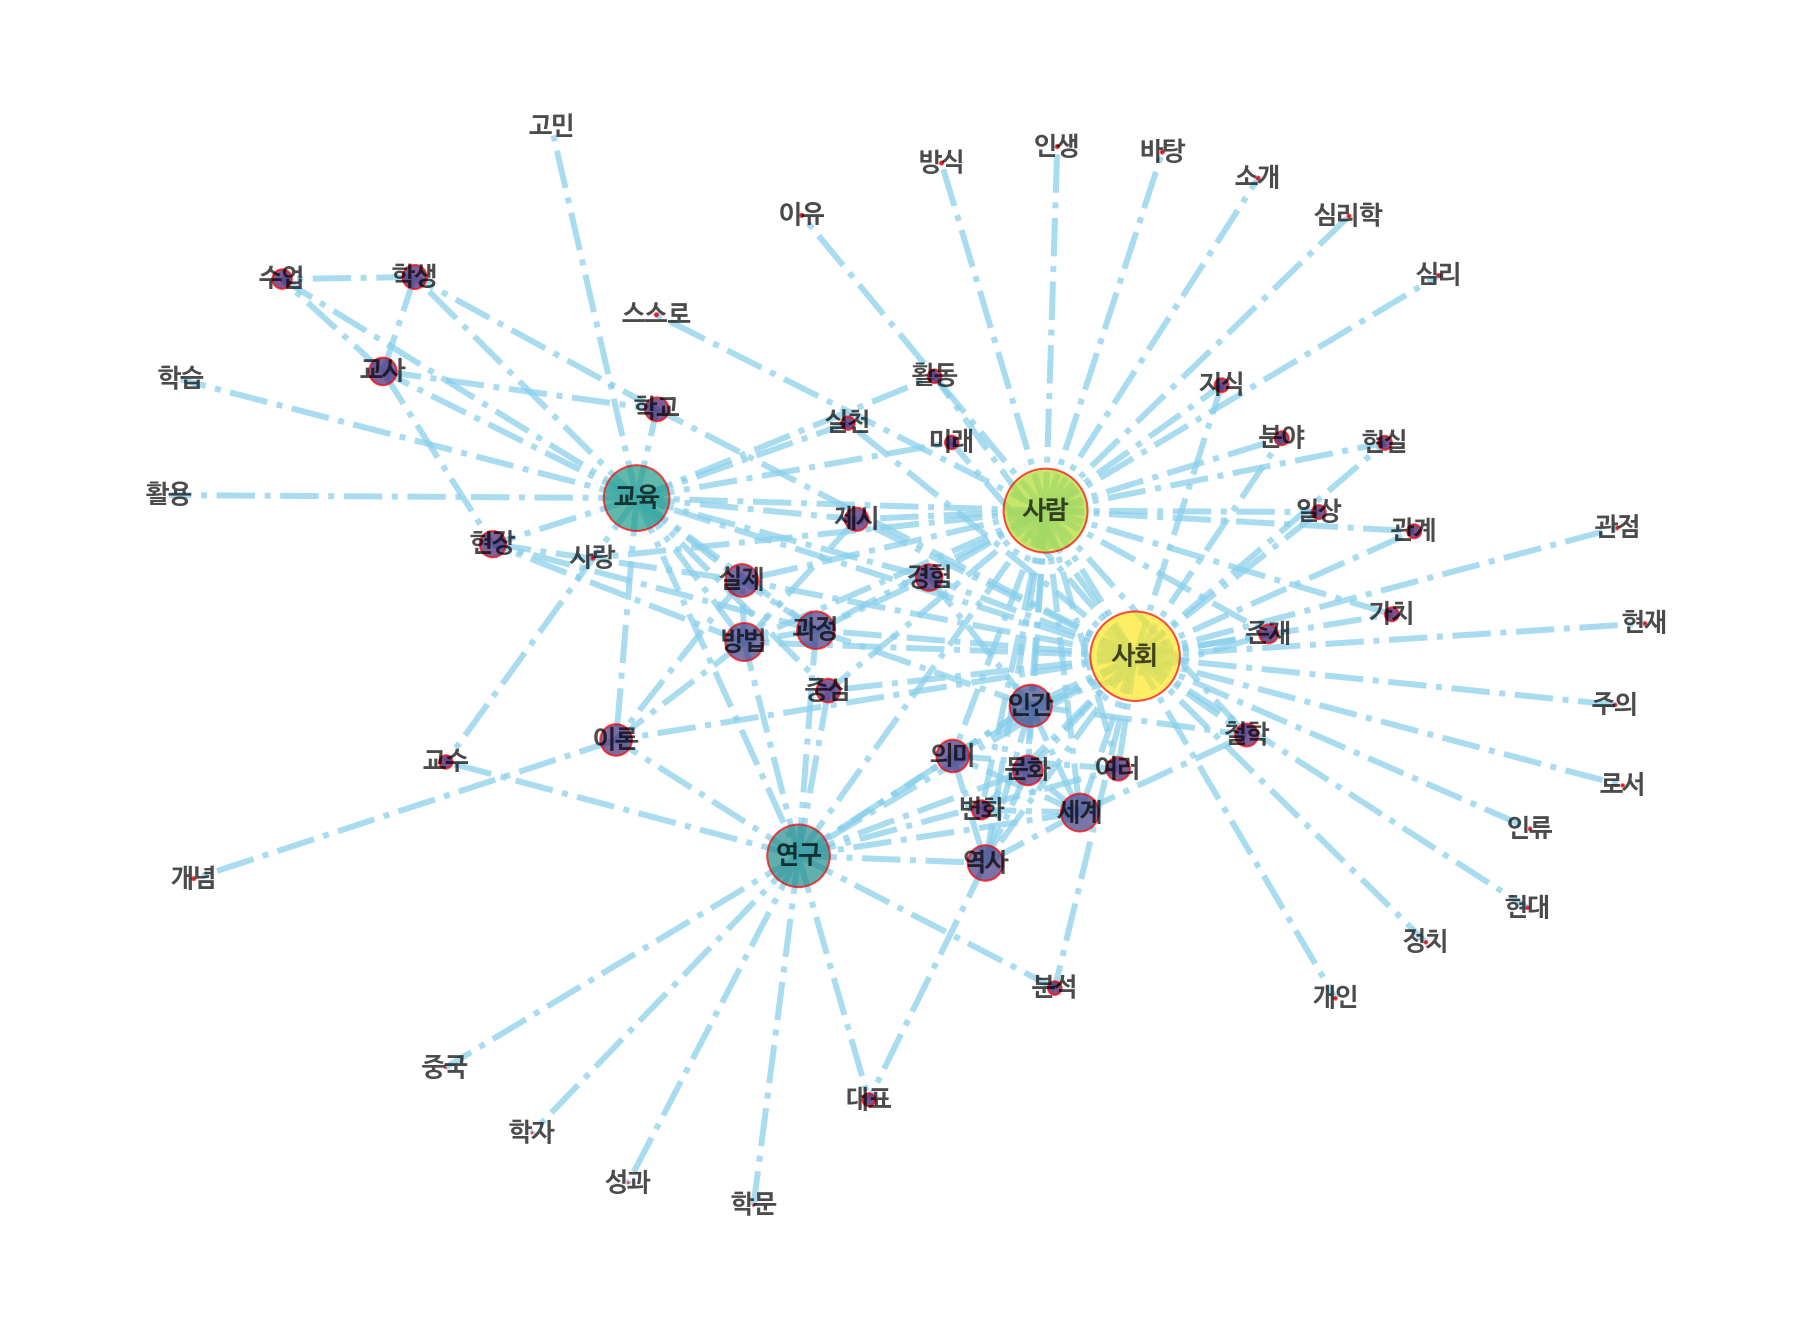

In [20]:
# 네트워크 그래프
plt.figure(figsize = (16, 12)); plt.axis('off')
nx.draw_networkx(G, font_family='NanumBarunGothic', font_size = 13, font_weight='bold',
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha = 0.7, width = 3, edge_color = 'skyblue', edgecolors='red', style = '-.')